# Financial Planning with APIs and Simulations

The application will forecast the performance of a retirement portfolio in 30 years by analyzing the current savings and determining if there are enough reserves for an emergency fund.


### Import the required libraries and dependencies

In [1]:

import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library


In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19104400,
            "id": 1,
            "last_updated": 1658885340,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 404717418415,
                    "percent_change_1h": -0.228973263195073,
                    "percent_change_24h": 0.42831415096264,
                    "percent_change_7d": -9.38982476558802,
                    "percentage_change_1h": -0.228973263195073,
                    "percentage_change_24h": 0.42831415096264,
                    "percentage_change_7d": -9.38982476558802,
                    "price": 21173.0,
                    "volume_24h": 51464524830
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19104400,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119840556,
            "id": 1027,
            "last_updated": 1658885338,
            "max_supply": 119840556,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 172735119079,
                    "percent_change_1h": -0.667371666493364,
                    "percent_change_24h": 1.29789598344354,
                    "percent_change_7d": -6.7439578618638,
                    "percentage_change_1h": -0.667371666493364,
                    "percentage_change_24h": 1.29789598344354,
                    "percentage_change_7d": -6.7439578618638,
                    "price": 1438.6,
                    "volume_24h": 16290761117
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119840556,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypt

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price of BTC is ${round(btc_price, 2)}.")

The current price of BTC is $21173.0.


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price of ETH is ${round(eth_price, 2)}.")

The current price of ETH is $1438.6.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"The current value of BTC holding is ${round(btc_value, 2)}.")

The current value of BTC holding is $25407.6.


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"The current value of ETH holding is ${round(eth_value, 2)}.")

The current value of ETH holding is $7624.58.


In [12]:
# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current cryptocurrency wallet balance is ${round(total_crypto_wallet, 2)}.")

The current cryptocurrency wallet balance is $33032.18.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK


In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: Ceate an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key,
                       alpaca_secret_key,
                       api_version = "v2")

#### Step 3: Set the following parameters for the Alpaca API call:


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
prices_df = alpaca.get_bars(tickers,
                              timeframe,
                              start_date,
                              end_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df["symbol"] == "SPY"].drop("symbol", axis = 1)
AGG = prices_df[prices_df["symbol"] == "AGG"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis = 1, keys = ["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
print(prices_df.head())

                              SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.29  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306  


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"The AGG closing price is ${agg_close_price}.")

The AGG closing price is $119.43.


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"The SPY closing price is ${spy_close_price}.")

The SPY closing price is $334.57.


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of the AGG bond portfolio is ${round(agg_value, 2)}.")

The current value of the AGG bond portfolio is $23886.0.


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the SPY stock portfolio is ${round(spy_value, 2)}.")

The current value of the SPY stock portfolio is $36802.7.


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the SPY stock and AGG bond portfolio is ${round(total_stocks_bonds, 2)}.")

The current balance of the SPY stock and AGG bond portfolio is $60688.7.


In [22]:
# Calculate the total value of the member's entire savings portfolio
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"The member's current value of the crypto wallet, SPY stock and AGG bond portolio is ${round(total_portfolio, 2)}.")

The member's current value of the crypto wallet, SPY stock and AGG bond portolio is $93720.88.


### Evaluate the Emergency Fund


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)    

[33032.18, 60688.7]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. 


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data,
                          columns = ["amount"],
                          index = ["crypto", "stock/bond"])

# Display the savings_df DataFrame
print(savings_df.head())

              amount
crypto      33032.18
stock/bond  60688.70


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"The member's share of crypto and stock/bond"}, ylabel='amount'>

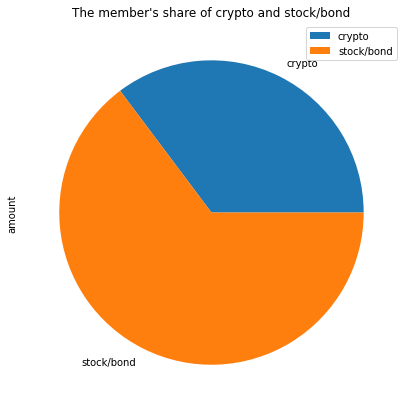

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y = "amount", figsize = (10,7), title = "The member's share of crypto and stock/bond")

#### Step 4: Determine if the current portfolio has enough to create an emergency fund. Ideally, an emergency fund should equal to three times the monthly income. 


In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = round(float(monthly_income * 3), 2)

In [27]:
# Retrieve the total savings amount
total_savings = round(savings_df["amount"].sum(), 2)

# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_savings > emergency_fund_value :
    print(f"Congratulations on surpassing your financial goal!")
elif total_savings == emergency_fund_value:
    print(f"Congratulations on reaching your financial goal!")
else:
    savings_needed = emergency_fund_value - total_savings
    print(f"You are only ${round(savings_needed, 2)} away from reaching your financial goal!")

Congratulations on surpassing your financial goal!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation


#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2017-08-07", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
prices_3_yr_df = alpaca.get_bars(tickers,
                                 timeframe,
                                 start_date,
                                 end_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_3_yr_df[prices_3_yr_df["symbol"] == "SPY"].drop("symbol", axis = 1)
AGG = prices_3_yr_df[prices_3_yr_df["symbol"] == "AGG"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
prices_3_yr_df = pd.concat([SPY, AGG], axis = 1, keys = ["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
display(prices_3_yr_df.head())
display(prices_3_yr_df.tail())

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.72  109.6066   
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.69  109.5000   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.87  109.6600   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.85  109.6700   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.94  109.6800   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-07 04:00:00+00:00  109.67  2359826        7755  109.674876  
2017-08-08 04:00:00+00:00  109.57  2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.67  2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.78  2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.87  1913253       10113  109.860974

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-08-03 04:00:00+00:00  328.31  329.62  327.73  328.79  53080454   
2020-08-04 04:00:00+00:00  327.88  330.06  327.86  330.06  41918004   
2020-08-05 04:00:00+00:00  331.46  332.39  331.18  332.11  42870955   
2020-08-06 04:00:00+00:00  331.52  334.46  331.13  334.33  43745653   
2020-08-07 04:00:00+00:00  333.29  334.88  332.30  334.57  57282821   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-08-03 04:00:00+00:00      288008  328.658804  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250900  329.057593  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290039  332.937218  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935181       39114  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_60_40_weighted = MCSimulation(portfolio_data = prices_3_yr_df,
                                 weights = [.60, .40],
                                 num_simulation = 500,
                                 num_trading_days = 252 * 30)

# Review the simulation input data
print(MC_60_40_weighted.portfolio_data.head())

                              SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69   
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002461  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_weighted.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\drew9\Bootcamp\UC Berkeley Extension Fintech\Coursework\Module 5\Module 5 Challenge\Repo\Financial_Planner_Simulator\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996230,0.997258,0.990862,1.001943,0.996753,0.990066,1.016823,0.996570,0.992535,1.000801,...,0.997366,1.002571,0.991101,0.995518,1.006105,0.996291,0.999513,0.993148,1.001644,1.002813
2,0.980780,0.983739,0.990385,0.991495,0.989026,0.994941,1.007260,1.002436,0.978319,1.001489,...,0.989546,1.001693,0.990332,0.993924,0.997756,1.002702,1.004534,0.997325,1.008285,1.009117
3,0.982815,0.979383,0.994448,0.992790,0.990210,0.995494,1.023642,0.991803,0.978078,0.985936,...,0.980698,1.011558,0.990470,0.993446,0.982207,1.005048,0.998455,0.989501,1.000906,1.003777
4,0.978757,0.990585,0.992137,0.980236,0.990447,1.007252,1.029258,0.986567,0.988873,0.988982,...,0.961888,1.017213,0.982754,0.988496,0.978941,1.014494,1.002196,0.993083,0.993339,1.006471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.423800,18.330499,40.522478,10.550665,4.331452,15.191723,8.025865,12.512016,4.943032,13.680687,...,13.438116,5.714123,3.766014,8.697312,12.411334,5.915055,28.543742,2.615050,9.578742,4.584026
7557,13.301168,18.440404,39.977779,10.550366,4.252359,14.985905,7.955045,12.555431,4.911110,13.676321,...,13.544420,5.694064,3.768719,8.632804,12.352384,5.976619,28.426478,2.617967,9.472459,4.590955
7558,13.408332,18.517426,40.017137,10.677605,4.277334,14.988375,7.920133,12.530094,4.843290,13.577239,...,13.425932,5.681374,3.828489,8.597144,12.277931,5.907472,28.083652,2.641022,9.495379,4.589079
7559,13.376612,18.729143,40.094002,10.667369,4.304678,14.930127,7.959945,12.488873,4.794123,13.477584,...,13.160085,5.626669,3.775126,8.520255,12.161944,5.965315,27.928720,2.598130,9.452402,4.563199


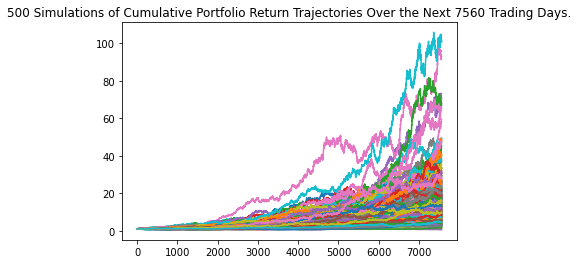

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
thirty_yr_line_plot = MC_60_40_weighted.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

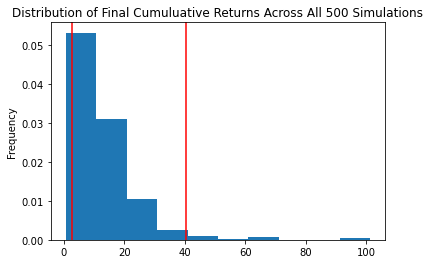

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram
thirty_yr_hist_plot = MC_60_40_weighted.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
thirty_yr_weighted_table = MC_60_40_weighted.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(thirty_yr_weighted_table)

count           500.000000
mean             13.055084
std              11.223577
min               0.610541
25%               6.242736
50%              10.015786
75%              16.869566
max             101.221161
95% CI Lower      2.655529
95% CI Upper     40.221394
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the SPY stock and AGG bond portion of the members portfolio is ${round(total_stocks_bonds, 2)}.")

The current value of the SPY stock and AGG bond portion of the members portfolio is $60688.7.


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(thirty_yr_weighted_table[8] * total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = round(thirty_yr_weighted_table[9] * total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that the SPY stock and AGG bond portion of the portfolio"
      f" with a 60% weight in SPY and 40% weight in AGG over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

There is a 95% chance that the SPY stock and AGG bond portion of the portfolio with a 60% weight in SPY and 40% weight in AGG over the next 30 years will end within in the range of $161160.61 and $2440984.12.


### Forecast Cumulative Returns in 10 Years


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_80_20_weighted = MCSimulation(portfolio_data = prices_3_yr_df,
                                 weights = [.80, .20],
                                 num_simulation = 500,
                                 num_trading_days = 252 * 10)

# Review the simulation input data
print(MC_80_20_weighted.portfolio_data.head())

                              SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69   
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002461  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_80_20_weighted.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\drew9\Bootcamp\UC Berkeley Extension Fintech\Coursework\Module 5\Module 5 Challenge\Repo\Financial_Planner_Simulator\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012250,1.014904,0.984457,1.003948,0.989511,0.999485,1.003196,0.998477,0.984282,1.004819,...,1.007957,0.994606,1.011912,0.981712,0.987478,0.987931,1.005162,0.980737,1.034147,0.980240
2,1.010036,1.029008,0.972523,1.001163,0.997173,1.005186,1.015403,1.007586,0.985444,1.009936,...,1.002963,0.999122,0.994889,0.999463,0.997995,0.992825,1.003754,0.983442,1.033050,0.982658
3,1.005253,1.029807,0.970477,1.000736,1.001863,1.018286,1.018599,0.992874,0.985405,0.996113,...,1.024195,1.012799,0.978033,0.996258,0.991658,1.003456,1.010757,0.967215,1.041087,0.999366
4,1.007814,1.050047,0.961436,0.995633,0.999582,1.012360,1.013146,0.995893,1.009975,0.983656,...,1.031437,1.003290,0.981353,0.998540,0.994325,1.008982,1.008146,0.965369,1.038493,1.003084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.971053,1.344224,2.214170,5.790535,1.588718,3.527975,2.731544,4.966943,2.334068,5.207193,...,4.602901,4.869647,2.241337,3.276880,2.748158,2.030677,4.033417,1.519276,2.163566,1.702700
2517,3.918328,1.362722,2.202733,5.787799,1.584992,3.544100,2.751276,4.997293,2.320336,5.117580,...,4.662791,4.936134,2.262163,3.263845,2.788052,2.000115,3.987983,1.524161,2.217949,1.663749
2518,3.952244,1.352687,2.185243,5.582945,1.613567,3.517044,2.760415,4.974418,2.297644,5.135099,...,4.680581,5.022515,2.248805,3.275406,2.840802,1.980333,3.968521,1.502908,2.262226,1.681184
2519,3.965602,1.340278,2.209865,5.531129,1.627996,3.492283,2.738233,4.882553,2.296070,5.118676,...,4.735077,5.092249,2.232394,3.332662,2.875724,1.989800,4.055108,1.483989,2.263696,1.679956


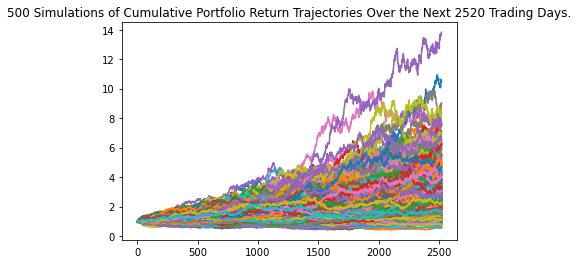

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
ten_yr_line_plot = MC_80_20_weighted.plot_simulation()

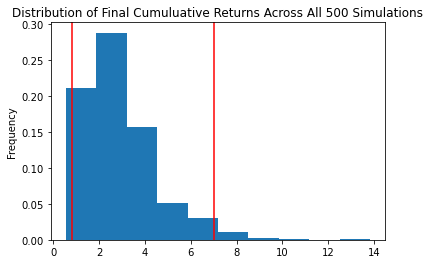

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
ten_yr_hist_plot = MC_80_20_weighted.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
ten_yr_weighted_table = MC_80_20_weighted.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(ten_yr_weighted_table)

count           500.000000
mean              2.869512
std               1.614503
min               0.538430
25%               1.755630
50%               2.547685
75%               3.489792
max              13.827685
95% CI Lower      0.813011
95% CI Upper      6.992611
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the portfolio and the summary statistics that were generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the SPY stock and AGG bond portion of the members portfolio is ${round(total_stocks_bonds, 2)}.")

The current value of the SPY stock and AGG bond portion of the members portfolio is $60688.7.


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_yr_weighted_table[8] * total_stocks_bonds, 2)
ci_upper_ten_cumulative_return = round(ten_yr_weighted_table[9] * total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that the SPY stock and AGG bond portion of the portfolio"
      f" with a 80% weight in SPY and 20% weight in AGG over the next 30 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")

There is a 95% chance that the SPY stock and AGG bond portion of the portfolio with a 80% weight in SPY and 20% weight in AGG over the next 30 years will end within in the range of $49340.6 and $424372.47.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** No the weighting of 80% stocks to 20% bonds only has an upper return of less than 1/2 a million dollars.  Thus, this wouldn't be enough for the credit union members to retire with after only 10 years.